In [1]:
import CellScopes as cs

WebIO._IJuliaInit()

Welcome to use CellScopes.jl!


### Step 1. Load the cs object generated in Figure 1

In [2]:
@time dkd1 = cs.load(filename = "../../processed_data/version_1/dkd1_by_CS.jld2") 

  8.427131 seconds (10.09 M allocations: 1.636 GiB, 6.56% gc time, 89.09% compilation time: 13% of which was recompilation)


VisiumObject in CellScopes.jl


Genes x Cells = 18063 x 2802
Available data:
- rawCount
- normCount
- metaData
- spmetaData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


### Step 2. Generate Spatial DimPlot for DKDG + GGS + x

In [3]:
using CairoMakie

In [4]:
empty_theme = Theme(
    Axis = (
        backgroundcolor = :transparent,
        leftspinevisible = false,
        rightspinevisible = false,
        bottomspinevisible = false,
        topspinevisible = false,
        xticklabelsvisible = false, 
        yticklabelsvisible = false,
        xgridcolor = :transparent,
        ygridcolor = :transparent,
        xminorticksvisible = false,
        yminorticksvisible = false,
        xticksvisible = false,
        yticksvisible = false,
        xautolimitmargin = (0.0,0.0),
        yautolimitmargin = (0.0,0.0),
    )
);

update_theme!(empty_theme)

#### Step 2.1. color palette

In [33]:
alpha= 0.01

cell_anno = ["DKDG",
    "SGS",
    "GGS",
    "PT",
    "Inj-T",
    "LH-CD",
    "Cast-T",
    "TLS",
    "I-IFTA",
    "Capsule",
    "Artery-C",
    "Artery-K",
    "Tumor",
    "Other"]
c_map = ["#fff088", 
    "#c3ab00",
    "#615500",
    "#a7c957",
    "#6a994e",
    "#90e0ef",
    "#0096c7",
    "#800080",
    "#A95C68",
    "#BF8F00",
    "#ff5a5f",
    "#AD002A",
    "#495057",
    ("#000000",alpha)]
anno_color=Dict(cell_anno .=> c_map);

#### Step 2.2. update meta data for x=Inj-T

In [29]:
using CSV
using DataFrames

anno_glom = CSV.read("../../meta/subclusters_glomeruli.csv", DataFrame);
anno_meta = CSV.read("../../meta/Morph-based_v2.csv", DataFrame);
rename!(anno_meta, :"Morph-based" => :Morph_based)

for i in 1:size(anno_meta, 1)
    if anno_glom.glom_class[i] != "none"
        anno_meta.Morph_based[i] = anno_glom.glom_class[i]
    end
end

anno_meta_deep_copy = deepcopy(anno_meta);

In [31]:
anno_meta.Morph_based = [x in ["DKDG", "GGS", "Inj-T"] ? x : "Other" for x in anno_meta.Morph_based];

dkd1.metaData.cluster = String.(anno_meta[!,"Morph_based"]);
dkd1.spmetaData.cluster = String.(anno_meta[!,"Morph_based"]);

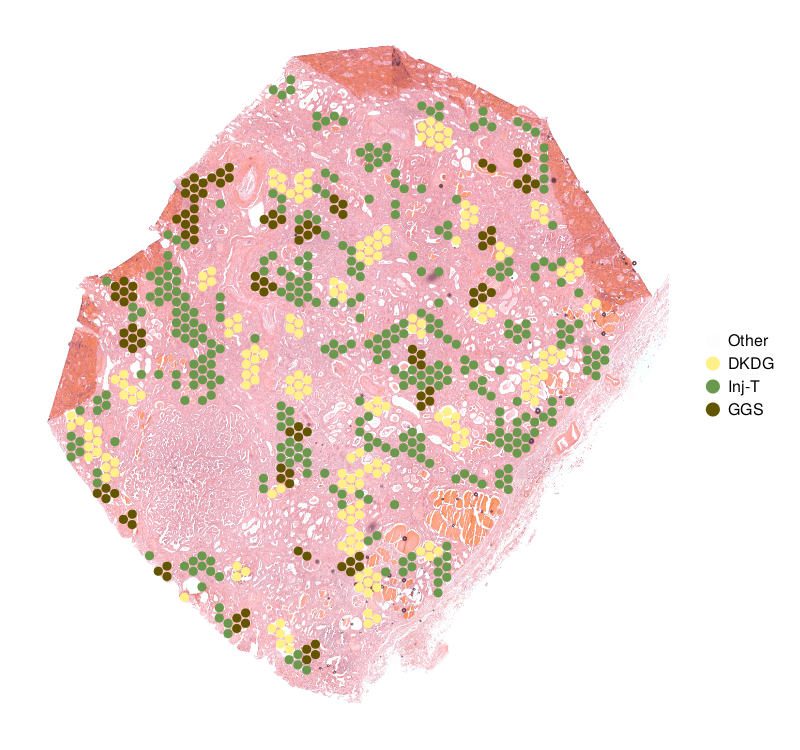

In [35]:
p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color);

save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_InjT.png", p);
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_InjT.pdf", p);
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_InjT.svg", p);

p  

#### Step 2.3. update meta data for x=PT

In [36]:
anno_meta = deepcopy(anno_meta_deep_copy)
anno_meta.Morph_based = [x in ["DKDG", "GGS", "PT"] ? x : "Other" for x in anno_meta.Morph_based];

dkd1.metaData.cluster = String.(anno_meta[!,"Morph_based"]);
dkd1.spmetaData.cluster = String.(anno_meta[!,"Morph_based"]);

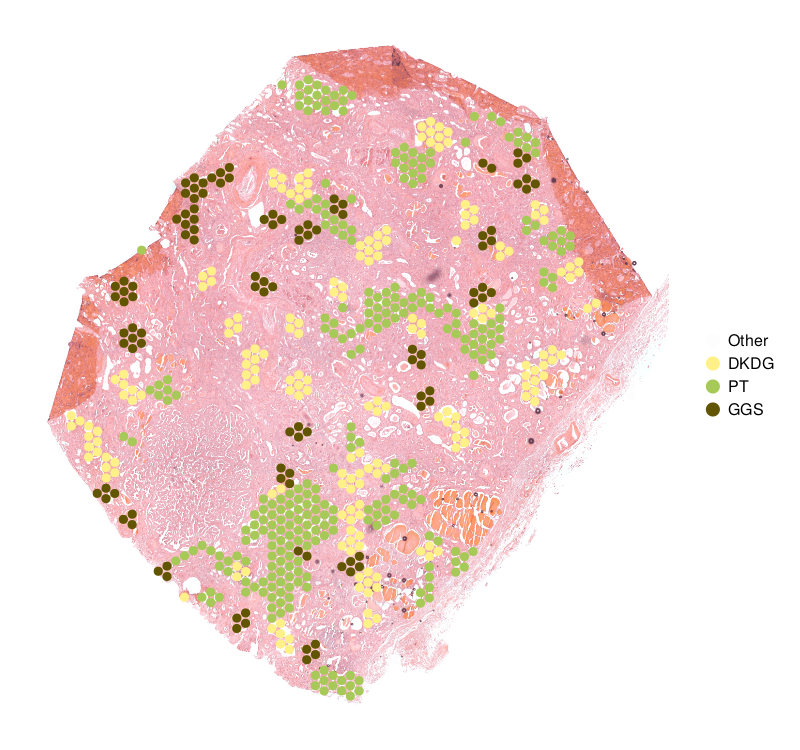

In [37]:
p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color);

save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_PT.png", p);
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_PT.pdf", p);
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_PT.svg", p);

p  

#### Step 2.4. update meta data for x=Cast-T

In [38]:
anno_meta = deepcopy(anno_meta_deep_copy)
anno_meta.Morph_based = [x in ["DKDG", "GGS", "Cast-T"] ? x : "Other" for x in anno_meta.Morph_based];

dkd1.metaData.cluster = String.(anno_meta[!,"Morph_based"]);
dkd1.spmetaData.cluster = String.(anno_meta[!,"Morph_based"]);

In [ ]:
p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=anno_color);

save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_CastT.png", p);
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_CastT.pdf", p);
save("../../plots/version_1/main_figures_cs/spDimPlot_cs_DKDG_GGS_CastT.svg", p);

p  